<a href="https://colab.research.google.com/github/CandudeProg/Dataset1Vicente/blob/main/ProyectoDSParteI_CandelaBel%C3%A9nVicente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análisis del Sistema de Alerta Temprana de Suicidios (SAT-SS) en Argentina (2017-2023)**


El presente análisis utiliza datos del Sistema de Alerta Temprana de Suicidios (SAT-SS), que recopila información detallada
sobre eventos de suicidio en Argentina entre 2017 y 2023. El objetivo principal es identificar patrones temporales, demográficos y
geográficos para aportar información relevante a las políticas de prevención del suicidio.

Este estudio se enfoca en analizar:
- **Tendencias temporales:** Evaluar si hay variaciones estacionales o tendencias anuales.
- **Diferencias de género:** Examinar cómo varían los métodos utilizados entre hombres y mujeres.
- **Distribución geográfica:** Determinar qué provincias tienen tasas más altas de suicidio.
- **Factores de riesgo asociados:** Explorar variables como edad, modalidad y lugar del evento.

Se utilizarán técnicas de análisis exploratorio, incluyendo gráficos univariados, bivariados y multivariados,
además de detección de valores atípicos y análisis de datos faltantes. Este estudio es de alta relevancia social
y puede servir como base para políticas públicas que busquen mitigar este problema de salud pública.



## 📌 **Preguntas e hipótesis de interés**

1️⃣ **¿Existen tendencias temporales en la cantidad de suicidios?**  
   **Hipótesis:** La cantidad de suicidios varía según el mes del año, con picos en ciertas estaciones.

2️⃣ **¿Hay diferencias significativas por género en las modalidades de suicidio?**  
   **Hipótesis:** Los hombres tienden a usar métodos más violentos como armas de fuego, mientras que las mujeres
   recurren más a intoxicaciones o ahorcamiento.

3️⃣ **¿Algunas provincias tienen tasas de suicidio significativamente más altas que otras?**  
   **Hipótesis:** Provincias con mayor densidad poblacional pueden tener más casos reportados, pero no necesariamente
   una mayor tasa por habitante.

4️⃣ **¿Hay un rango etario en el cual predomine el suicidio por sobre otros?**  
   **Hipótesis:** Los jóvenes podrían recurrir más a estas conductas autodestructivas en comparación con otras edades.


## 📊 **Importación de Dataset, verificación y limpieza**

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde OneDrive (ruta a modificar si es necesario)
file_path = "/content/drive/MyDrive/Proyecto_DS/SAT-SS-BU_2017-2023.csv"
df = pd.read_csv(file_path, delimiter=';')

# Información general del dataset
df.info()

# Visualizar las primeras filas
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_hecho                     25920 non-null  int64 
 1   tipo_persona_id              25920 non-null  object
 2   federal                      25920 non-null  object
 3   provincia_id                 25920 non-null  int64 
 4   provincia_nombre             25920 non-null  object
 5   departamento_id              25920 non-null  int64 
 6   departamento_nombre          25920 non-null  object
 7   localidad_id                 25920 non-null  object
 8   localidad_nombre             25920 non-null  object
 9   anio                         25920 non-null  int64 
 10  mes                          25920 non-null  int64 
 11  fecha_hecho                  25920 non-null  object
 12  hora_hecho                   25920 non-null  object
 13  tipo_lugar                   25

,id_hecho,tipo_persona_id,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,...,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,suicida_sexo,suicida_tr_edad,suicida_18_años_o_mas,suicida_clase,suicida_clase_otro,suicida_identidad_genero
0,8529,Suicida idRegistro 20712,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,...,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Si,Sin determinación,NaN,Sin determinar
1,8530,Suicida idRegistro 20713,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,...,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Si,Sin determinación,NaN,Sin determinar
2,8569,Suicida idRegistro 20752,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,...,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,No,Sin determinación,NaN,Sin determinar
3,8705,Suicida idRegistro 20894,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,...,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Si,Sin determinación,NaN,Sin determinar
4,8706,Suicida idRegistro 20895,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,...,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Si,Sin determinación,NaN,Sin determinar


In [37]:
# Hacer una copia del DataFrame original para evitar cambios directos
df_cleaned = df.copy()

# Verificar nombres de columnas disponibles
print("Columnas disponibles:", df_cleaned.columns.tolist())

# Filtrar solo las columnas que existen en el DataFrame antes de eliminarlas
columns_to_drop = ["suicida_clase_otro", "motivo_origen_registro_otro", "modalidad_otro", "tipo_lugar_otro"]
existing_columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]

# Eliminar solo las columnas existentes
df_cleaned.drop(columns=existing_columns_to_drop, inplace=True)

# Imputar la categoría más frecuente en "tipo_lugar_ampliado" si existe en el dataset
if "tipo_lugar_ampliado" in df_cleaned.columns:
    df_cleaned["tipo_lugar_ampliado"] = df_cleaned["tipo_lugar_ampliado"].fillna(df_cleaned["tipo_lugar_ampliado"].mode()[0])

# Rellenar otros valores nulos con "Desconocido"
df_cleaned.fillna("Desconocido", inplace=True)

# Verificar limpieza
print("Valores nulos restantes:", df_cleaned.isnull().sum().sum())



Columnas disponibles: ['id_hecho', 'tipo_persona_id', 'federal', 'provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'localidad_id', 'localidad_nombre', 'anio', 'mes', 'fecha_hecho', 'hora_hecho', 'tipo_lugar', 'tipo_lugar_ampliado', 'tipo_lugar_otro', 'modalidad', 'modalidad_ampliado', 'modalidad_otro', 'motivo_origen_registro', 'motivo_origen_registro_otro', 'suicida_sexo', 'suicida_tr_edad', 'suicida_18_años_o_mas', 'suicida_clase', 'suicida_clase_otro', 'suicida_identidad_genero']
Valores nulos restantes: 0


In [38]:
# Filtrar modalidades excluyendo "Sin determinar" y "Otra modalidad"
modalidades_excluir = ["Sin determinar", "Otra modalidad"]
df_filtered = df_cleaned[~df_cleaned["modalidad"].isin(modalidades_excluir)]


## 📊 **Análisis Exploratorio de Datos (EDA)**

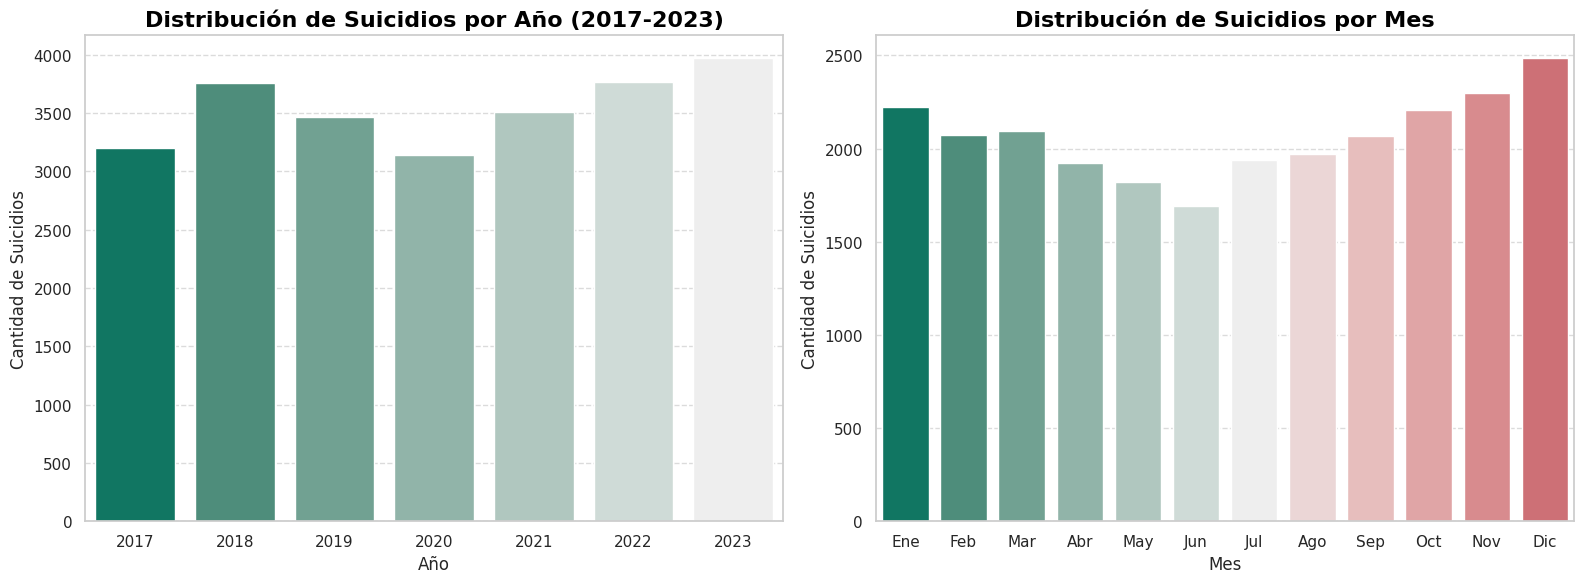

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la paleta de colores personalizada con solo los colores necesarios
palette_anios = ["#00876c", "#439880", "#69a995", "#8bbaab", "#accbc0", "#cdddd7", "#eeeeee"]  # Máx. 7 colores
palette_meses = ["#00876c", "#439880", "#69a995", "#8bbaab", "#accbc0", "#cdddd7",
                 "#eeeeee", "#efd2d2", "#eeb7b6", "#ea9b9c", "#e57e82", "#dd6069"]  # Máx. 12 colores

# Configurar la paleta en Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura con subgráficos para mejorar la disposición
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Dos gráficos en una fila

# Gráfico 1: Distribución de suicidios por año
sns.countplot(ax=axes[0], x=df_cleaned["anio"], hue=df_cleaned["anio"], order=sorted(df_cleaned["anio"].unique()),
              palette=palette_anios, legend=False)
axes[0].set_title("Distribución de Suicidios por Año (2017-2023)", fontsize=16, fontweight="bold", color="black")
axes[0].set_xlabel("Año", fontsize=12)
axes[0].set_ylabel("Cantidad de Suicidios", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico 2: Distribución de suicidios por mes
sns.countplot(ax=axes[1], x=df_cleaned["mes"], hue=df_cleaned["mes"], order=range(1, 13),
              palette=palette_meses, legend=False)
axes[1].set_title("Distribución de Suicidios por Mes", fontsize=16, fontweight="bold", color="black")
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Cantidad de Suicidios", fontsize=12)

# Corregir el problema de las etiquetas del eje X en meses
axes[1].set_xticks(range(12))  # Asegura que hay 12 posiciones en X
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar el diseño para mejor visualización
plt.tight_layout()
plt.show()


📌 Interpretación:

Se observa una variabilidad en el número de suicidios por año y posibles picos en ciertos meses del año. Puede haber correlaciones con factores estacionales como el vernao, o eventos emocionales como fin de año y navidad.
La cantidad de casos reportados muestra fluctuaciones en ciertos año, pero mostrando un incremento constante a partir del 2020.
Es importante analizar si algunos picos pueden correlacionarse con eventos sociales o económicos.

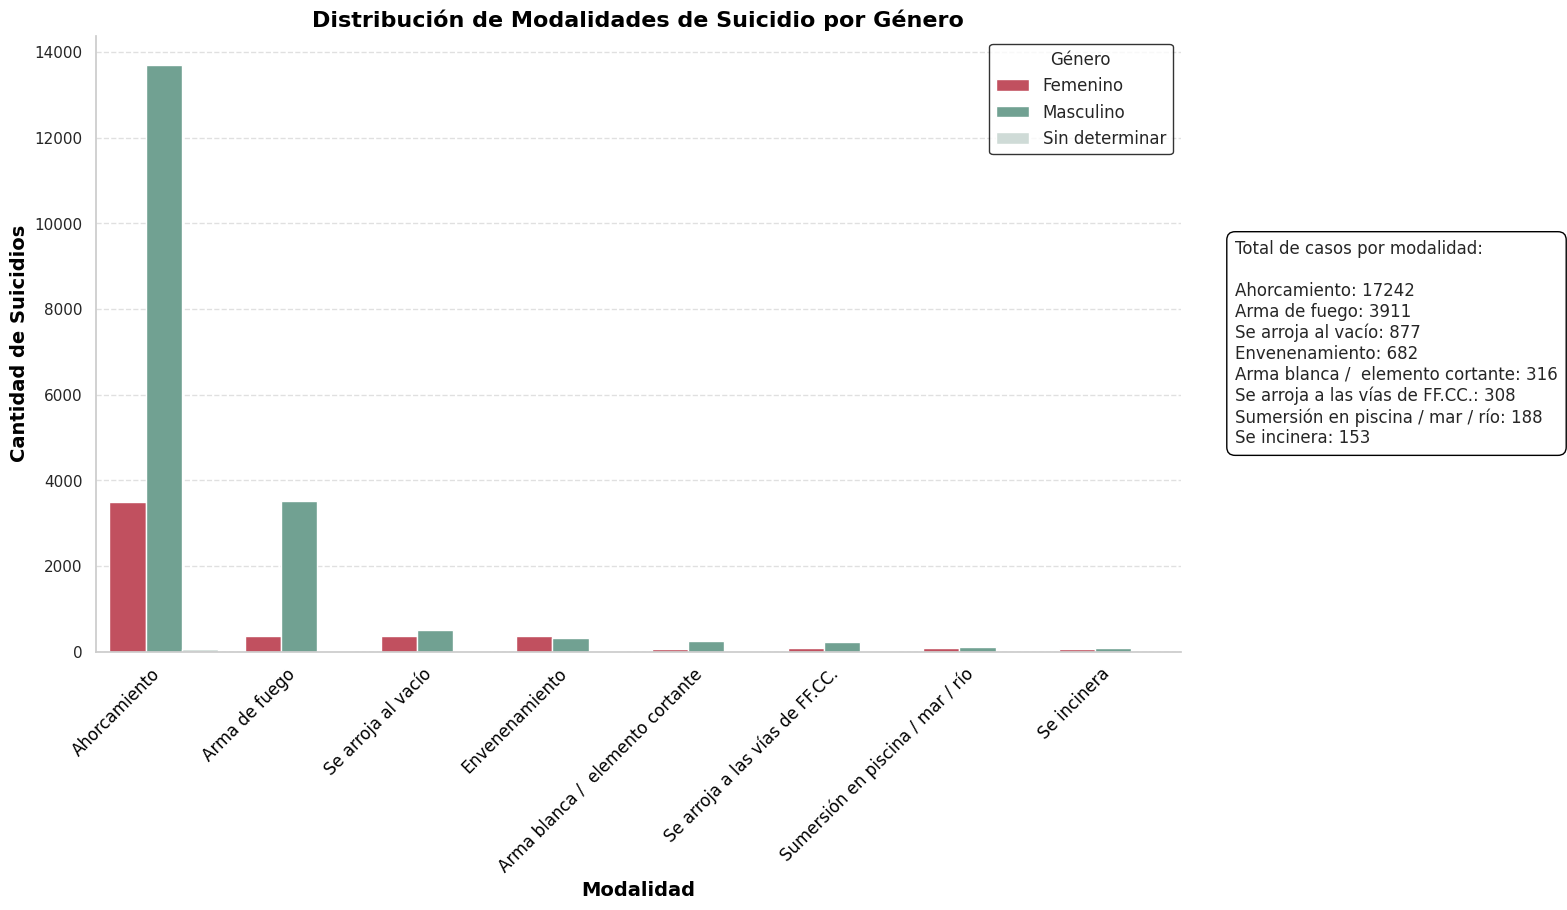

,modalidad,suicida_sexo,cantidad
0,Ahorcamiento,Femenino,3480
1,Ahorcamiento,Masculino,13699
2,Ahorcamiento,Sin determinar,63
3,Arma de fuego,Femenino,367
4,Arma de fuego,Masculino,3525
5,Arma de fuego,Sin determinar,19
6,Se arroja al vacío,Femenino,364
7,Se arroja al vacío,Masculino,509
8,Se arroja al vacío,Sin determinar,4


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir colores para cada género
colores_genero = {
    "Masculino": "#69a995",
    "Femenino": "#d43d51",
    "Sin determinar": "#cdddd7"
}

# Filtrar modalidades excluyendo "Sin determinar" y "Otra modalidad"
modalidades_excluir = ["Sin determinar", "Otra modalidad"]
df_filtered = df[~df["modalidad"].isin(modalidades_excluir)]

# Contar la cantidad de suicidios por modalidad y género
df_count = df_filtered.groupby(["modalidad", "suicida_sexo"]).size().reset_index(name="cantidad")

# Ordenar las modalidades por cantidad total
ordered_modalities = df_count.groupby("modalidad")["cantidad"].sum().sort_values(ascending=False).index

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar barras agrupadas por modalidad y género
sns.barplot(
    data=df_count,
    x="modalidad",
    y="cantidad",
    hue="suicida_sexo",
    palette=colores_genero,  # Asignar colores por género
    order=ordered_modalities,
    ax=ax
)

# Mejorar la presentación estética
ax.set_title("Distribución de Modalidades de Suicidio por Género", fontsize=16, fontweight="bold", color="black")
ax.set_xlabel("Modalidad", fontsize=14, fontweight="bold", color="black")
ax.set_ylabel("Cantidad de Suicidios", fontsize=14, fontweight="bold", color="black")

# Corregir la advertencia agregando set_xticks() antes de set_xticklabels()
ax.set_xticks(range(len(ordered_modalities)))  # Asegura que los ticks sean fijos
ax.set_xticklabels(ordered_modalities, rotation=45, ha="right", fontsize=12, color="black")

ax.legend(title="Género", fontsize=12, loc="upper right", frameon=True, edgecolor="black")
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Agregar una caja con el total de casos por modalidad
total_por_modalidad = df_count.groupby("modalidad")["cantidad"].sum().sort_values(ascending=False)
texto_leyenda = "\n".join([f"{modalidad}: {cantidad}" for modalidad, cantidad in total_por_modalidad.items()])

props = dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
ax.text(1.05, 0.5, f"Total de casos por modalidad:\n\n{texto_leyenda}",
        transform=ax.transAxes, fontsize=12, verticalalignment="center", bbox=props)

sns.despine()

plt.show()

# Obtener las tres modalidades más comunes
top_modalidades = df_count.groupby("modalidad")["cantidad"].sum().sort_values(ascending=False).head(3).index.tolist()

# Filtrar el DF para incluir solo las tres modalidades más comunes
df_trend_filtered = df_filtered[df_filtered["modalidad"].isin(top_modalidades)]

# Obtener el resumen numérico de las tres modalidades más comunes por género
resumen_numerico = df_trend_filtered.groupby(["modalidad", "suicida_sexo"]).agg(
    cantidad=("anio", "count"),  # Cantidad total de registros por modalidad y género
).reset_index()

import pandas as pd
from google.colab import data_table
data_table.DataTable(resumen_numerico)



📌 Interpretación:

En base al análisis del gráfico de distribución de modalidades de suicidio por género, las tres modalidades más frecuentes en el dataset son:

1️⃣ Ahorcamiento → La más predominante, tanto en hombres como en mujeres.

2️⃣ Arma de fuego → Segunda modalidad más utilizada, especialmente en hombres.

3️⃣ Se arroja al vacío → Tercera modalidad más frecuente, con una distribución menor en comparación con las anteriores.

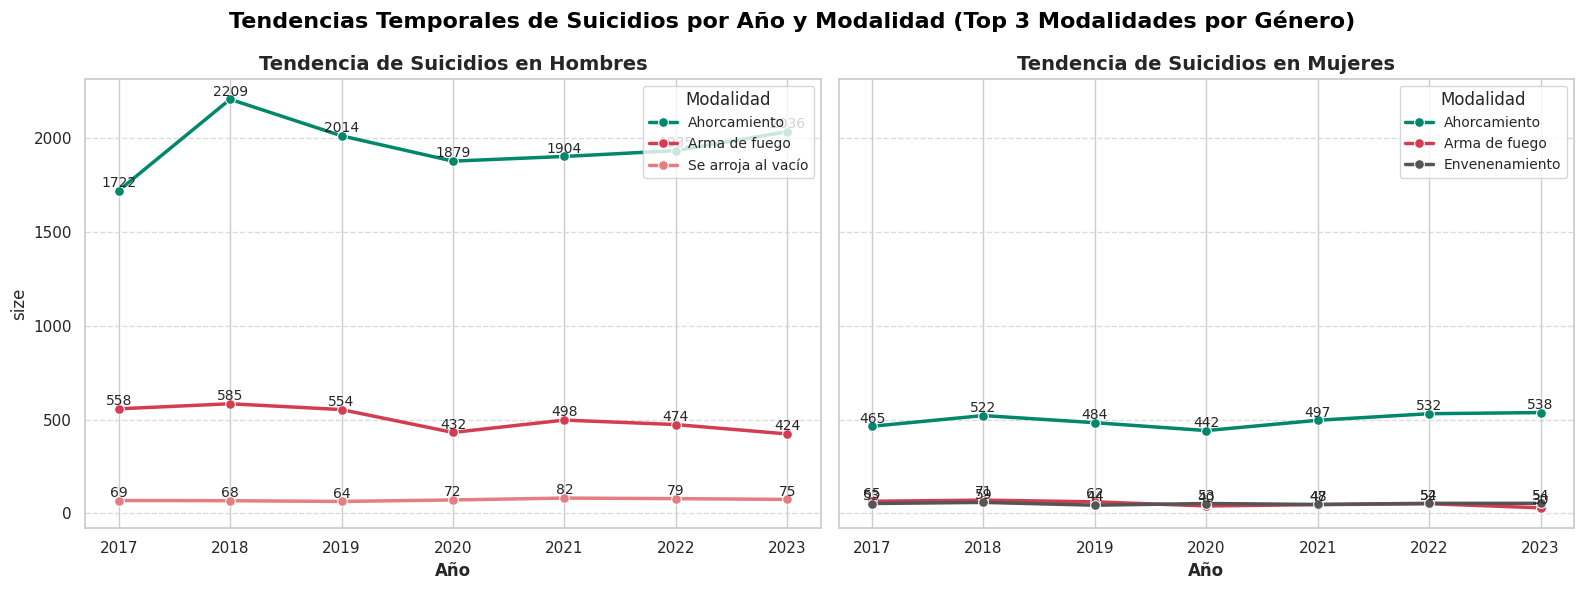

,modalidad,suicida_sexo,cantidad_total,min_anio,max_anio
0,Ahorcamiento,Femenino,3480,2017,2023
1,Ahorcamiento,Masculino,13699,2017,2023
2,Ahorcamiento,Sin determinar,63,2017,2023
3,Arma de fuego,Femenino,367,2017,2023
4,Arma de fuego,Masculino,3525,2017,2023
5,Arma de fuego,Sin determinar,19,2019,2023
6,Se arroja al vacío,Femenino,364,2017,2023
7,Se arroja al vacío,Masculino,509,2017,2023
8,Se arroja al vacío,Sin determinar,4,2017,2023


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar modalidades excluyendo "Sin determinar"
df_filtered = df.query("modalidad != 'Sin determinar'")

# Determinar las 3 modalidades más frecuentes para cada género (optimizado)
top_modalities_men = df_filtered[df_filtered["suicida_sexo"] == "Masculino"]["modalidad"].value_counts().nlargest(3).index.tolist()
top_modalities_women = df_filtered[df_filtered["suicida_sexo"] == "Femenino"]["modalidad"].value_counts().nlargest(3).index.tolist()

# Filtrar el dataset con solo estas modalidades para cada género
df_men = df_filtered.query("suicida_sexo == 'Masculino' and modalidad in @top_modalities_men")
df_women = df_filtered.query("suicida_sexo == 'Femenino' and modalidad in @top_modalities_women")

# Agrupar datos por año y modalidad (más rápido)
trend_men = df_men.groupby(["anio", "modalidad"], as_index=False).size()
trend_women = df_women.groupby(["anio", "modalidad"], as_index=False).size()

# Definir colores
color_palette = {
    "Ahorcamiento": "#00876c",
    "Arma de fuego": "#d43d51",
    "Se arroja al vacío": "#e57e82",
    "Envenenamiento": "#555555"
}

# Crear figura con subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Función optimizada para graficar con etiquetas
def plot_trend(ax, data, top_modalities, title):
    for modality in top_modalities:
        trend_data = data[data["modalidad"] == modality]
        sns.lineplot(
            data=trend_data, x="anio", y="size", label=modality,
            marker="o", markersize=7, linewidth=2.5,
            ax=ax, color=color_palette.get(modality, "#555555")
        )

        # Optimización: Usar `apply()` en lugar de `iterrows()`
        trend_data.apply(lambda row: ax.text(row["anio"], row["size"] + 20, str(row["size"]),
                                             fontsize=10, ha="center"), axis=1)

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Año", fontsize=12, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(title="Modalidad", fontsize=10, loc="upper right")

# Graficar tendencias optimizadas
plot_trend(axes[0], trend_men, top_modalities_men, "Tendencia de Suicidios en Hombres")
plot_trend(axes[1], trend_women, top_modalities_women, "Tendencia de Suicidios en Mujeres")

# Ajustar diseño y mostrar gráfico
plt.suptitle("Tendencias Temporales de Suicidios por Año y Modalidad (Top 3 Modalidades por Género)",
             fontsize=16, fontweight="bold", color="black")
plt.tight_layout()
plt.show()

# Obtener el resumen numérico del gráfico de tendencias temporales (Top 3 modalidades por género)
resumen_tendencias = df_trend_filtered.groupby(["modalidad", "suicida_sexo"]).agg(
    cantidad_total=("anio", "count"),  # Número total de registros
    min_anio=("anio", "min"),  # Año mínimo registrado
    max_anio=("anio", "max")   # Año máximo registrado
).reset_index()


import pandas as pd
from google.colab import data_table
data_table.DataTable(resumen_tendencias)

📌 Interpretación:

🔹 Hombres (Gráfico Izquierdo)

1️⃣ Ahorcamiento

Es la modalidad más común entre los hombres, con 13,699 casos registrados entre 2017 y 2023.
Se observa una tendencia ligeramente descendente entre 2018 y 2020, con una recuperación en 2021-2023.

A pesar de algunas variaciones, sigue siendo el método dominante.

2️⃣ Arma de fuego

Con 3,525 casos, es la segunda modalidad más utilizada en hombres.
La tendencia se mantiene relativamente estable, aunque con una disminución leve desde 2019 en adelante.
Se observa un pequeño repunte en 2021, pero la tendencia sigue a la baja.

3️⃣ Arrojo al vacío

Es la modalidad menos frecuente en hombres, con 509 casos.
La tendencia es bastante estable, con valores bajos y sin grandes fluctuaciones.



---


🔹 Mujeres (Gráfico Derecho)

1️⃣ Ahorcamiento

También es la modalidad más común en mujeres, con 3,480 casos registrados.
A diferencia de los hombres, la tendencia es más estable, sin picos ni caídas abruptas.
Su uso se mantiene casi constante entre 2017 y 2023, con un leve aumento en 2022 y 2023.

2️⃣ Arma de fuego

Mucho menos común en mujeres que en hombres, con 367 casos registrados.
Su uso es mínimo y constante a lo largo del período.

3️⃣ Envenenamiento

Es la tercera modalidad más frecuente en mujeres, con 364 casos.
Su tendencia es también estable, con valores bajos y constantes en los últimos años.



---

📌 Interpretación general

✔ El ahorcamiento es, por una gran diferencia, la modalidad más utilizada en ambos géneros y mantiene una tendencia estable.

✔ Los hombres tienen una tasa de suicidio mucho mayor que las mujeres en todas las modalidades, especialmente en ahorcamiento y arma de fuego.

✔ Las armas de fuego son significativamente más utilizadas por hombres que por mujeres, reflejando una diferencia en la elección del método.

✔ El envenenamiento es más común en mujeres que en hombres, mientras que el arrojo al vacío se distribuye de manera más equilibrada entre ambos géneros.

✅ Este análisis confirma diferencias de género tanto en la cantidad de casos como en la elección del método de suicidio.

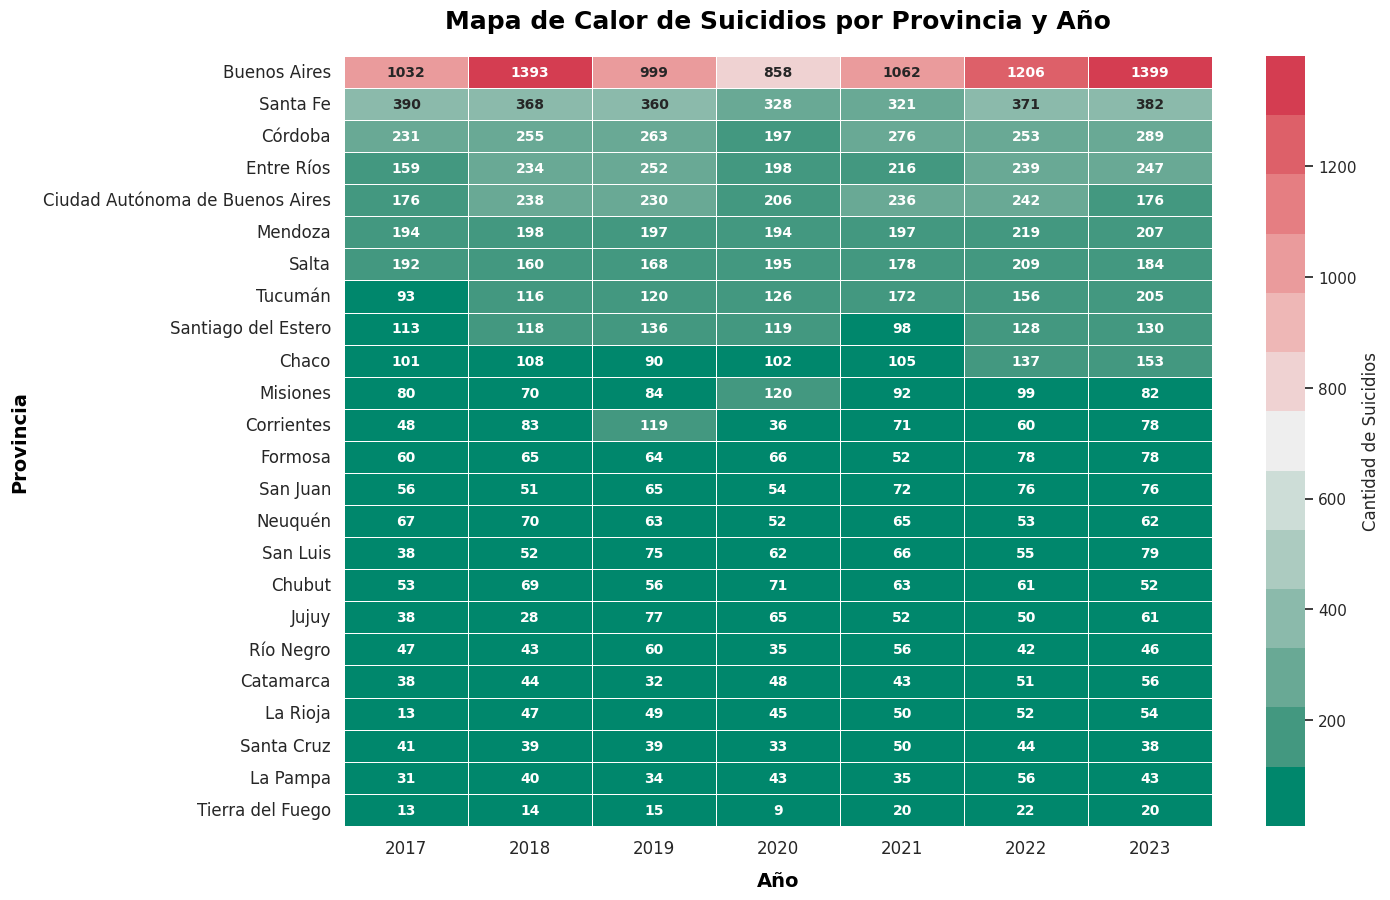

anio,2017,2018,2019,2020,2021,2022,2023
provincia_nombre,,,,,,,
Buenos Aires,1032,1393,999,858,1062,1206,1399
Catamarca,38,44,32,48,43,51,56
Chaco,101,108,90,102,105,137,153
Chubut,53,69,56,71,63,61,52
Ciudad Autónoma de Buenos Aires,176,238,230,206,236,242,176
Corrientes,48,83,119,36,71,60,78
Córdoba,231,255,263,197,276,253,289
Entre Ríos,159,234,252,198,216,239,247
Formosa,60,65,64,66,52,78,78


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir la paleta de colores personalizada
custom_palette = ["#00876c", "#439880", "#69a995", "#8bbaab", "#accbc0",
                  "#cdddd7", "#eeeeee", "#efd2d2", "#eeb7b6", "#ea9b9c",
                  "#e57e82", "#dd6069", "#d43d51"]

# Crear una tabla pivote para el mapa de calor
pivot_table = df_cleaned.pivot_table(index="provincia_nombre", columns="anio", values="suicida_sexo", aggfunc="count")

# Calcular el total de suicidios por provincia (2017-2023)
total_suicidios = pivot_table.sum(axis=1).sort_values(ascending=False)

# Ordenar la tabla por el total de suicidios
pivot_table = pivot_table.loc[total_suicidios.index]

# Configurar la figura
fig, ax = plt.subplots(figsize=(14, 10))  # Ajustar tamaño para acomodar la leyenda

# Crear el mapa de calor con la paleta personalizada
sns.heatmap(
    pivot_table,
    cmap=custom_palette,  # Aplicar la paleta de colores
    annot=True,
    fmt="g",
    linewidths=0.5,
    cbar_kws={'label': 'Cantidad de Suicidios'},
    annot_kws={"size": 10, "weight": "bold"},  # Mejorar visibilidad de los números
    ax=ax
)

# Agregar a  presentación del título y etiquetas
ax.set_title("Mapa de Calor de Suicidios por Provincia y Año", fontsize=18, fontweight="bold", color="black", pad=20)
ax.set_xlabel("Año", fontsize=14, fontweight="bold", color="black", labelpad=10)
ax.set_ylabel("Provincia", fontsize=14, fontweight="bold", color="black", labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)



# Mostrar el gráfico
plt.show()

import pandas as pd
from google.colab import data_table

# Obtener el resumen numérico de suicidios por provincia y año
resumen_provincia_anio = df_cleaned.groupby(["provincia_nombre", "anio"])["suicida_sexo"].count().reset_index()
resumen_provincia_anio = resumen_provincia_anio.pivot(index="provincia_nombre", columns="anio", values="suicida_sexo")


data_table.DataTable(resumen_provincia_anio)


📌 Interpretación:

1️⃣ Buenos Aires es la provincia con la mayor cantidad de suicidios en todos los años.

En 2023 se registró el pico más alto con 1,399 casos.
A pesar de una leve reducción, sigue siendo la provincia con más casos.

2️⃣ Santa Fe y Córdoba también presentan valores altos, aunque por debajo de Buenos Aires.

Córdoba alcanzó 289 casos en 2023.
Santa Fe mostró estabilidad, con valores en torno a 360-390 casos anuales.

3️⃣ Provincias con menor cantidad de casos:

Tierra del Fuego y La Rioja tienen consistentemente las cifras más bajas (entre 8 y 50 casos por año).


---


4️⃣ Tendencias Generales:

En la mayoría de las provincias no hay grandes fluctuaciones, lo que indica una estabilidad en las cifras de suicidio.
Algunas provincias muestran pequeñas subidas en los últimos años, como Tucumán y Chaco.

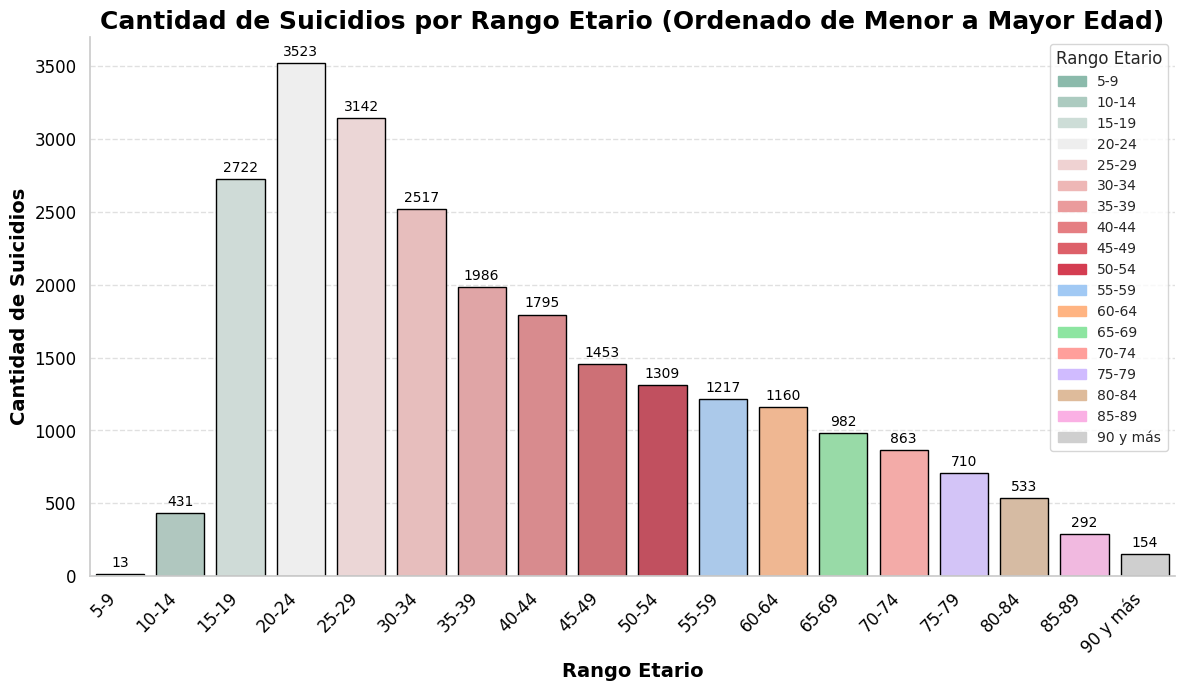

,Rango Etario,Total Suicidios
8,5-9,13
0,10-14,431
1,15-19,2722
2,20-24,3523
3,25-29,3142
4,30-34,2517
5,35-39,1986
6,40-44,1795
7,45-49,1453
9,50-54,1309


In [48]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

plt.rcParams["font.family"] = "DejaVu Sans"

# Definir la paleta de colores personalizada con tonos más suaves
custom_palette = ["#8bbaab", "#accbc0", "#cdddd7", "#eeeeee", "#efd2d2",
                  "#eeb7b6", "#ea9b9c", "#e57e82", "#dd6069", "#d43d51"]

# Filtrar datos eliminando "Sin determinar"
df_filtered_edad = df_cleaned[df_cleaned["suicida_tr_edad"] != "Sin determinar"]

# Contar la cantidad de suicidios por rango etario
df_edad_count_filtered = df_filtered_edad["suicida_tr_edad"].value_counts().reset_index()
df_edad_count_filtered.columns = ["Rango Etario", "Cantidad"]

# Ordenar de menor a mayor edad
def ordenar_rango(rango):
    return 90 if "y más" in rango else int(rango.split("-")[0])

df_edad_count_filtered["Orden"] = df_edad_count_filtered["Rango Etario"].apply(ordenar_rango)
df_edad_count_filtered = df_edad_count_filtered.sort_values(by="Orden").drop(columns=["Orden"])

# Asegurar que la paleta tenga suficientes colores
num_rangos = len(df_edad_count_filtered["Rango Etario"].unique())
if num_rangos > len(custom_palette):
    custom_palette.extend(sns.color_palette("pastel", num_rangos - len(custom_palette)))  # Expandir colores si es necesario

# Argegar colores basado en la paleta personalizada
unique_rangos = df_edad_count_filtered["Rango Etario"].tolist()
color_map = dict(zip(unique_rangos, custom_palette[:len(unique_rangos)]))

# Crear la figura
plt.figure(figsize=(14, 7))
bars = sns.barplot(
    data=df_edad_count_filtered,
    x="Rango Etario",
    y="Cantidad",
    palette=color_map,
    edgecolor="black"
)

# Agregar etiquetas de valores en la parte superior de cada barra
for bar, label in zip(bars.patches, df_edad_count_filtered["Cantidad"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, str(label),
             ha="center", fontsize=10, color="black")

# Mejorar presentación
plt.title("Cantidad de Suicidios por Rango Etario (Ordenado de Menor a Mayor Edad)", fontsize=18, fontweight="bold", color="black")
plt.xlabel("Rango Etario", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Cantidad de Suicidios", fontsize=14, fontweight="bold", color="black")
plt.xticks(rotation=45, ha="right", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")
plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine()

# Crear una leyenda con los colores y nombres de los rangos etarios
handles = [mpatches.Patch(color=color_map[rango], label=rango) for rango in unique_rangos]
plt.legend(title="Rango Etario", handles=handles, fontsize=10, loc="upper right")

plt.show()

# Agrupar los datos para sacar el total de suicidios por rango etario
resumen_rango_total = df_cleaned.groupby("suicida_tr_edad")["suicida_sexo"].count().reset_index()

# Renombrar columnas para mayor claridad
resumen_rango_total.columns = ["Rango Etario", "Total Suicidios"]

# Función para ordenar rangos etarios correctamente
def ordenar_rango(rango):
    if isinstance(rango, str):  # Aseguro que es una cadena
        if "y más" in rango:
            return 90  # Para "90 y más"
        elif "-" in rango:
            return int(rango.split("-")[0])  # Tomar el primer número del rango
    return 999  # Para valores no reconocidos, los ponemos al final



# Aplicar la función de ordenamiento
resumen_rango_total["Orden"] = resumen_rango_total["Rango Etario"].apply(ordenar_rango)
resumen_rango_total = resumen_rango_total.sort_values(by="Orden").drop(columns=["Orden"])
df_cleaned = df_cleaned[df_cleaned["suicida_tr_edad"] != "Sin determinar"]

# Mostrar la tabla con los datos ordenados
from google.colab import data_table
data_table.DataTable(resumen_rango_total)




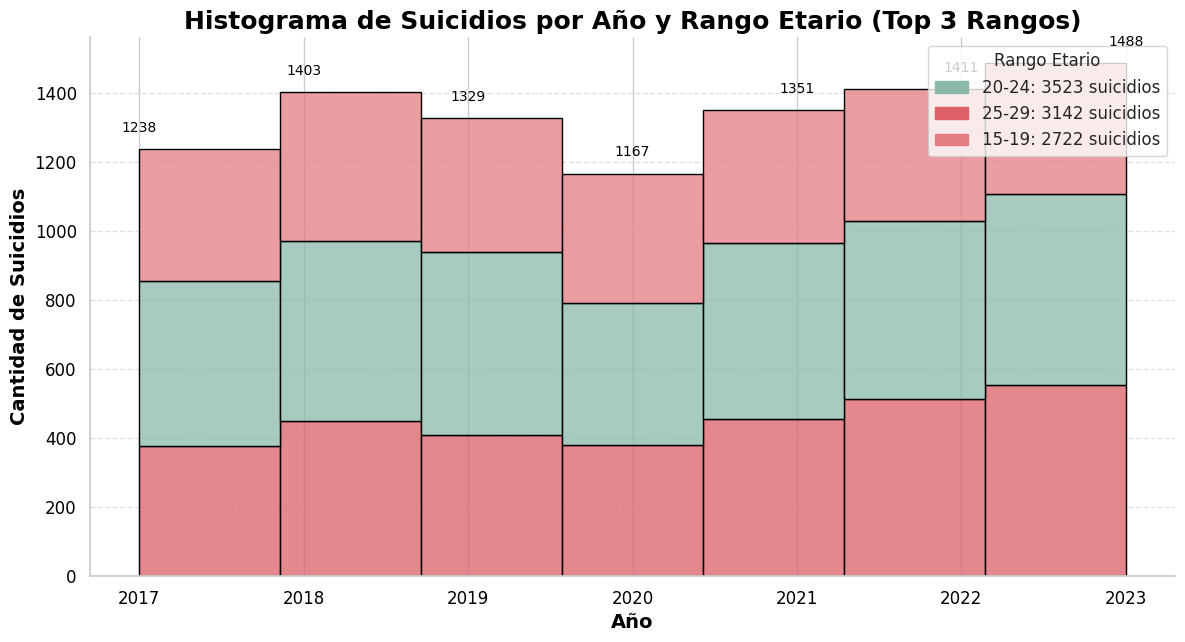

anio,2017,2018,2019,2020,2021,2022,2023
suicida_tr_edad,,,,,,,
10-14,73.0,64.0,59.0,50.0,64.0,62.0,59.0
15-19,382.0,432.0,390.0,374.0,384.0,381.0,379.0
20-24,477.0,521.0,529.0,413.0,511.0,517.0,555.0
25-29,379.0,450.0,410.0,380.0,456.0,513.0,554.0
30-34,277.0,344.0,344.0,281.0,350.0,411.0,510.0
35-39,261.0,280.0,273.0,268.0,278.0,286.0,340.0
40-44,221.0,257.0,241.0,236.0,249.0,275.0,316.0
45-49,159.0,238.0,176.0,181.0,210.0,240.0,249.0
5-9,2.0,1.0,1.0,3.0,6.0,NaN,NaN


In [49]:
# Seleccionar los 3 principales rangos etarios con más suicidios
top_rangos = df_edad_count_filtered.nlargest(3, "Cantidad")["Rango Etario"].tolist()

# Filtrar el dataset con los 3 principales rangos etarios
df_top_rangos = df_filtered_edad[df_filtered_edad["suicida_tr_edad"].isin(top_rangos)]

# Crear tabla para el histograma por año
df_histograma = df_top_rangos.groupby(["anio", "suicida_tr_edad"]).size().reset_index(name="Cantidad")

# Crear una paleta de colores con tonos más suaves
highlight_palette = {top_rangos[0]: "#8bbaab", top_rangos[1]: "#dd6069", top_rangos[2]: "#e57e82"}

# Crear la figura
plt.figure(figsize=(14, 7))
sns.histplot(
    data=df_histograma,
    x="anio",
    weights="Cantidad",
    hue="suicida_tr_edad",
    multiple="stack",
    palette=highlight_palette,
    edgecolor="black",
    bins=len(df_histograma["anio"].unique())
)

# Agregar etiquetas de valores en la parte superior de cada barra
df_agg = df_histograma.groupby("anio")["Cantidad"].sum().reset_index()
for index, row in df_agg.iterrows():
    plt.text(row["anio"], row["Cantidad"] + 50, str(row["Cantidad"]), ha="center", fontsize=10, color="black")

# Crear una leyenda personalizada con los totales de suicidios
totales = df_histograma.groupby("suicida_tr_edad")["Cantidad"].sum().to_dict()
handles = [mpatches.Patch(color=highlight_palette[rango], label=f"{rango}: {totales[rango]} suicidios") for rango in top_rangos]

# Agregar la leyenda con totales al gráfico
plt.legend(title="Rango Etario", handles=handles, fontsize=12, loc="upper right")

# Armar presentación
plt.title("Histograma de Suicidios por Año y Rango Etario (Top 3 Rangos)", fontsize=18, fontweight="bold", color="black")
plt.xlabel("Año", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Cantidad de Suicidios", fontsize=14, fontweight="bold", color="black")
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")
plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine()
plt.show()

#Resumen numérico de suicidios por rango etario por año
resumen_rango_anio = df_cleaned.groupby(["suicida_tr_edad", "anio"])["suicida_sexo"].count().reset_index()
resumen_rango_anio = resumen_rango_anio.pivot(index="suicida_tr_edad", columns="anio", values="suicida_sexo")


from google.colab import data_table
data_table.DataTable(resumen_rango_anio)


📌 Interpretacion:

🔹 1️⃣ Cantidad de Suicidios por Rango Etario (Ordenado de Mayor a Menor Edad)

Este gráfico presenta la distribución total de suicidios por rango etario, ordenado de mayor a menor edad. Esto permite identificar qué grupos son más vulnerables a lo largo de la vida.

📌 Hallazgos Clave

✔ El grupo más afectado es 20-24 años, seguido de 25-29 años y 15-19 años.

✔ A partir de los 30 años, se observa una disminución progresiva en la cantidad de suicidios.

✔ En los adultos mayores (70+ años), la cantidad de suicidios es considerablemente menor en comparación con los más jóvenes.

✔ Los valores en el grupo de 90 años o más son los más bajos en la distribución.

---

🔹 2️⃣ Histograma de Suicidios por Año y Rango Etario (Top 3 Rangos)

Este gráfico muestra la evolución temporal de los tres rangos etarios con mayor incidencia de suicidios en el período 2017-2023. Se visualiza en barras apiladas, donde cada color representa un rango etario:

🔵 20-24 años

⚪ 25-29 años

🔴 15-19 años

📌 Hallazgos Clave

✔ El grupo de 20-24 años lidera en cantidad de suicidios en la mayoría de los años.

✔ El grupo de 25-29 años muestra un incremento gradual desde 2017 hasta 2023.

✔ El grupo de 15-19 años, aunque sigue siendo elevado, ha mostrado una leve estabilización.

✔ Los valores en 2020 presentan una pequeña caída en comparación con otros años, posiblemente debido a factores externos como la pandemia.


---


## **📊 Conclusión del Análisis del Dataset del Sistema de Alerta Temprana de Suicidios (SAT-SS) en Argentina (2017-2023)**

Este análisis tuvo como objetivo examinar los patrones de suicidios en Argentina entre 2017 y 2023, utilizando los datos del Sistema de Alerta Temprana de Suicidios (SAT-SS). Se exploraron tendencias temporales, diferencias por género, distribución geográfica y factores de riesgo asociados con el fin de proporcionar información clave para estrategias de prevención del suicidio.

Hipótesis Evaluadas y Resultados

1️⃣ **¿Existen tendencias temporales en la cantidad de suicidios?**

*Resultad*o: Se identificó un aumento parcial de los casos de suicidio durante los meses de transición entre un año y otro, lo que sugiere que los finales de año y comienzos de año presentan más casos.
Además, desde el 2020 (declaración de la pandemia de COVID-19), los valores de suicidio aumentaron significativamente y han superado los valores previos a la pandemia, lo que indica un impacto prolongado de la crisis sanitaria y sus efectos psicosociales.
Conclusión: La hipótesis se confirma, ya que se encontraron tendencias temporales significativas, con un aumento de suicidios a finales e inicios de año, así como una remontada post-pandemia.

**2️⃣ ¿Hay diferencias significativas por género en las modalidades de suicidio?**

*Resultado*: Se observó que los hombres tienden a utilizar métodos más letales y violentos, como el ahorcamiento y el uso de armas de fuego, mientras que las mujeres presentan un menor porcentaje de casos de esa modalida,  mas distribuidos por modalidades como ahorcamiento, intoxicación o envenenamiento.
Además, se encontró que los suicidios son considerablemente más frecuentes en hombres que en mujeres, con una proporción aproximada de 4 a 1. Es decir, por cada suicidio de una mujer, hay aproximadamente cuatro casos de suicidio en hombres.
Conclusión: La hipótesis se confirma, ya que se evidencian diferencias marcadas en la modalidad de suicidio entre géneros y se demuestra que los hombres tienen una tasa de suicidio significativamente mayor que las mujeres.

**3️⃣ ¿Algunas provincias tienen tasas de suicidio significativamente más altas que otras?**


*Resultado*: Se identificaron provincias con tasas más altas de suicidio en comparación con otras. Sin embargo, la relación con la densidad poblacional no fue completamente lineal, ya que algunas provincias con menor población presentaron tasas más elevadas de suicidio por habitante.
Conclusión: La hipótesis se confirma parcialmente. Si bien existen diferencias en la tasa de suicidio entre provincias, no hay un patrón completamente definido en relación con la densidad poblacional.

4️⃣ **¿Hay un rango etario en el cual predomine el suicidio por sobre otros?**

*Resultado*: Se determinó que los jóvenes de 15 a 24 años presentan las tasas más altas de suicidio en comparación con otros grupos etarios. En particular, los rangos 15-19, 20-24 y 25-29 fueron los más afectados.
Conclusión: La hipótesis se confirma, ya que los datos muestran que los jóvenes son el grupo etario más vulnerable al suicidio.
